In [1]:
!pip install ffn
!pip install pandas
!pip install matplotlib

<AxesSubplot:xlabel='Date'>

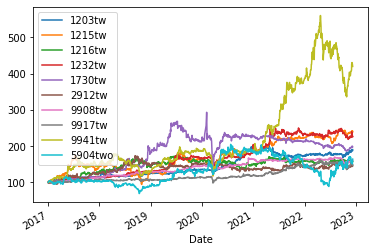

In [8]:
import matplotlib.pyplot as plt
import ffn
import pandas as pd 

#################
#輸入回測之資產 (需要至Yahoo財經查看代碼 https://tw.stock.yahoo.com/quote/2330)

##範例1
#asset = "1101.TW,1102.TW,1215.TW,3430.TWO"

##範例2
#asset = "QQQ,TQQQ,SPY"

##回測資產輸入  (台灣上市股票是.TW ，上櫃股票是TWO)
asset ="2330.TW,0050.TW,qqq"

##權重分配(非必填) ，依照需要回測個數填入相加等於1之值 ,若填空會產出平均分配1組並另外隨機生成10組權重
#Proportion = [0.3,0.3,0.3,0.1] 若有四項資產則即前三檔占比0.3,第四檔占比0.1。
#Proportion = [0.2,0.2,0.2,0.2,0.1,0.1] 若有六項資產可參考此Proportion，算四項占比0.2，後兩項占比0.1

Proportion = []
#################

prices = ffn.get(asset,start='2017-01-01' )#,itot,gld,ivv,uso

prices.to_csv('大擂台用.csv',encoding="utf_8_sig")

prices.rebase().plot()  #畫每個資產走勢

# 創造資產組合(這邊都不用動，只有上面那格需要更改)

平均分配權重
average-asset 1203.TW,1215.TW,1216.TW,1232.TW,1730.TW,2912.TW,9908.TW,9917.TW,9941.TW,5904.TW [0.33333333 0.33333333 0.33333333]
隨機生成之權重
mutiple_asset1 1203.TW,1215.TW,1216.TW,1232.TW,1730.TW,2912.TW,9908.TW,9917.TW,9941.TW,5904.TW [0.22662839 0.55292078 0.22045083]
mutiple_asset2 1203.TW,1215.TW,1216.TW,1232.TW,1730.TW,2912.TW,9908.TW,9917.TW,9941.TW,5904.TW [0.27031324 0.35935616 0.3703306 ]
mutiple_asset3 1203.TW,1215.TW,1216.TW,1232.TW,1730.TW,2912.TW,9908.TW,9917.TW,9941.TW,5904.TW [0.19106741 0.03036347 0.77856913]
mutiple_asset4 1203.TW,1215.TW,1216.TW,1232.TW,1730.TW,2912.TW,9908.TW,9917.TW,9941.TW,5904.TW [0.41888039 0.05499073 0.52612888]
mutiple_asset5 1203.TW,1215.TW,1216.TW,1232.TW,1730.TW,2912.TW,9908.TW,9917.TW,9941.TW,5904.TW [0.03166178 0.95626026 0.01207796]
mutiple_asset6 1203.TW,1215.TW,1216.TW,1232.TW,1730.TW,2912.TW,9908.TW,9917.TW,9941.TW,5904.TW [0.17563085 0.73429524 0.09007391]
mutiple_asset7 1203.TW,1215.TW,1216.TW,1232.TW,1730.TW,2912.TW,9908.TW,9917.

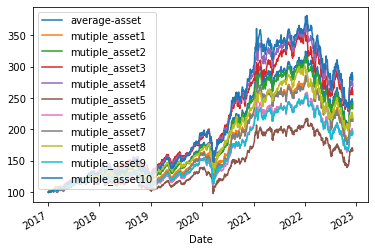

In [7]:
#######這邊都不用動
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random


strategies = {}

"""
asset_per = np.zeros((int(len(prices.columns)),int(len(prices.columns))), dtype=float)
for num in range(0,len(prices.columns)) :
    asset_per[num][num] = 1 
    strategies[prices.columns[num]] = (prices.rebase() * asset_per[num]).mean(axis=1).rebase()
"""
%matplotlib inline
if Proportion == [] :
    strategies['average-asset'] = (prices.rebase() * (np.full(len(prices.columns),1/len(prices.columns)))).mean(axis=1).rebase()
    print("平均分配權重")
    print('average-asset' ,asset ,np.full(len(prices.columns),1/len(prices.columns)))
    print("隨機生成之權重")
    average = np.full(len(prices.columns),1/len(prices.columns))
    for i in range(0,10):
        for _ in range(0,10000):
            random_folat = random.uniform(0.01, 0.05)
            random1 = random.randrange(len(prices.columns))
            random2 = random.randrange(len(prices.columns))
            if average[random2] - random_folat > 0:
                average[random1] = average[random1] + random_folat
                average[random2] = average[random2] - random_folat
       
        print('mutiple_asset' + str(i+1),asset ,average)
        strategies['mutiple_asset' + str(i+1)] = (prices.rebase() * average).mean(axis=1).rebase()

else :
    print("權重")
    strategies['Proportion'] = (prices.rebase() * Proportion).mean(axis=1).rebase()
    print('Proportion',asset ,Proportion )
    
strategies = pd.DataFrame(strategies)
strategies.plot()

#隱藏警告 並計算stats
import warnings
warnings.filterwarnings('ignore')

stats = strategies.calc_stats()
stats = pd.DataFrame(
    {
        name:pd.Series({key:getattr(pf, key) for key in dir(pf) if isinstance(getattr(pf, key), float)}, name=name) 
        for name,pf in stats.items()
    }).transpose()
print("\n")
print("stats可以使用參數")
print(stats.columns)


# 資產回測結果

In [ ]:
strategies.plot()
print("年化報酬")
print(stats.cagr)
print("最大回撤:")
print(stats.max_drawdown)
print("夏普值")
print(stats.daily_sharpe)